# Homework 1


## Derive a reliability function R(t) for each system.

   A) 
   $$R_1(t) = 1.0 - (1.0 - (R_{cpu} \cdot R_{mem}))^2$$
   $$R_1(t) = 1.0 - (1.0 - R_{cpu} R_{mem})^2$$
   $$R_1(t) = 1.0 - (1.0 - 2R_{cpu}R_{mem} + R_{cpu}^2 R_{mem}^2)$$
   $$R_1(t) = 2R_{cpu} R_{mem} - R_{cpu}^2 R_{mem}^2$$
   
   B) 
   $$R_2(t) = (1.0 - (1.0 - R_{cpu})^2) \cdot (1.0 - (1.0 - R_{mem})^2)$$
   $$R_2(t) = (1.0 - (1.0 - 2R_{cpu} + R_{cpu}^2)) \cdot (1.0 - (1.0 - 2R_{mem} + R_{mem}^2))$$
   $$R_2(t) = (2R_{cpu} - R_{cpu}^2) \cdot (2R_{mem} - R_{mem}^2)$$

## Using the reliability functions from part 1, determine which system is more reliable. Fully explain your reasoning and show your work. Assume that failures in each module are independent and exponentially distributed. The mean time between failure (MTBF) of a CPU module is 9 hours and the memory (MEM) module is 6 hours.

**Following is a Python script to compare the systems' realibilities**

A little bit overview of what I did in this script:

1. Rewrote the formulas for $R_1(t)$ and $R_2(t)$ in Python with MTBF values for CPU and memory modules
2. Derived the exponential CDF function from $R_1(t)$ and $R_2(t)$ by this formula $F(t) = 1 - R(t)$

In [1]:
import matplotlib.pyplot as plt
from math import exp

In [11]:
lambda_cpu = 1 / 9 #  1 / MTBF_cpu
lambda_mem = 1 / 6 # 1 / MTBF_mem

# R(t) = e^-λt -> per module
Rcpu_fn = lambda t: exp(-lambda_cpu * t)
Rmem_fn = lambda t: exp(-lambda_mem * t)

R1_fn = lambda t: 2*Rcpu_fn(t)*Rmem_fn(t) - Rcpu_fn(t)**2 * Rmem_fn(t)**2
R2_fn = lambda t: (2*Rcpu_fn(t)-Rcpu_fn(t) ** 2) * (2*Rmem_fn(t) - Rmem_fn(t)**2)

# Exponential CDF: F(t) = 1 - R(t)
F1_fn = lambda t: 1.0 - R1_fn(t)
F2_fn = lambda t: 1.0 - R2_fn(t)

In [3]:
t = list(range(60))
F1 = list(map(F1_fn, t))
F2 = list(map(F2_fn, t))

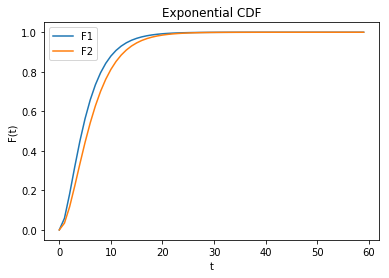

In [4]:
plt.plot(t, F1, label="F1")
plt.plot(t, F2, label="F2")
plt.title("Exponential CDF")
plt.ylabel("F(t)")
plt.xlabel("t")
plt.legend()
plt.show()

From $t\approx 0$ to $t \approx 20$, the graph shows that **system B** has a lower failure rate, meaning **system B is more reliable**. 

## Memory modules are easier to protect than CPU modules, what would the MTBF of a memory module need to be to change your decision (if at all)? Explain.

Since we know that from question 2 that system B is more reliable, our main objective for solving this problem is how to reverse the statement by only changing $MTBF_{mem}$. In other words, we want to make $R_1(t) \lt R_2(t)$ to become $R_1(t) \gt R_2(t)$ by varying the $MTBF_{mem}$. That way, we can express the problem with the following math equations:

$$R_1(t) \gt R_2(t) $$

$$2R_{cpu} R_{mem} - R_{cpu}^2 R_{mem}^2 \gt (2R_{cpu} - R_{cpu}^2) \cdot (2R_{mem} - R_{mem}^2) $$

$$2R_{cpu} R_{mem} - R_{cpu}^2 R_{mem}^2 \gt 4R_{cpu} R_{mem} - 2R_{cpu} R_{mem}^2 - 2R_{mem} R_{cpu}^2 + R_{cpu}^2 R_{mem}^2$$

$$0 \gt 2R_{cpu} R_{mem} - 2R_{cpu} R_{mem}^2 - 2R_{mem} R_{cpu}^2 + 2R_{cpu}^2 R_{mem}^2$$

Divide both sides by 2:
$$0 \gt R_{cpu} R_{mem} - R_{cpu} R_{mem}^2 - R_{mem} R_{cpu}^2 + R_{cpu}^2 R_{mem}^2$$

Factor:
$$0 \gt R_{cpu} R_{mem} ( 1 - R_{mem} - R_{cpu} + R_{cpu} R_{mem} ) $$

Factor Again:
$$0 \gt R_{cpu} R_{mem} ( 1 - R_{mem} ) (1 - R_{cpu} ) $$

Expand $R_{cpu}$ and $R_{mem}$. However, $R_{mem}$ is going to use $MTBF$ instead of **6** since this is the variable that we're trying to get.

$$0 \gt e^{-\frac{1}{9} \cdot t} e^{-\frac{1}{MTBF} \cdot t}(1 - e^{-\frac{1}{MTBF} \cdot t})(1 - e^{-\frac{1}{9} \cdot t})$$

Unfortunately, I can't show the reason using this math equation because my lack of math ability in solving this problem. However, I can simulate this process using a Python script, which is similar to the previous code. The only difference is that instead of using $\frac{1}{6}$ for $λ_{mem}$, then we transform that into a variable called `mem_mtbf` in the `test` function. After this modification, what I did was to iterate `MTBF` from 1 to 600000. 

**For the simulation video, you can find that here: [https://youtu.be/03j8nXq9nB4](https://youtu.be/03j8nXq9nB4) or in the archive, called** `simulation.mov`**. For the source code, you can find that in the archive, called **`simulation.py`

In the simulation video, we see that F1 is always getting closer to F2 everytime $MTBF$ increases. However, from $MTBF = 1$ to $MTBF = 600000$, F1 never surpasses F2. From this observation, we can draw a conclusion that **it's not possible to make system A more reliable than system B by simply making the memory module to be safer**. Though someone might argue that the reasoning is not strong enough to only use the trend line, the last $MTBF$ in the simulation is **600,000 hours (68.49 years)**, which is big enough to reason that even if it's possible to have F1 suparssing F2 with higher $MTBF$, it's no longer practical in real world because it can be really expensive to make that happen and probably impossible to create such thing.

*Note: the full raw data is attached in the archive called `data.txt`*